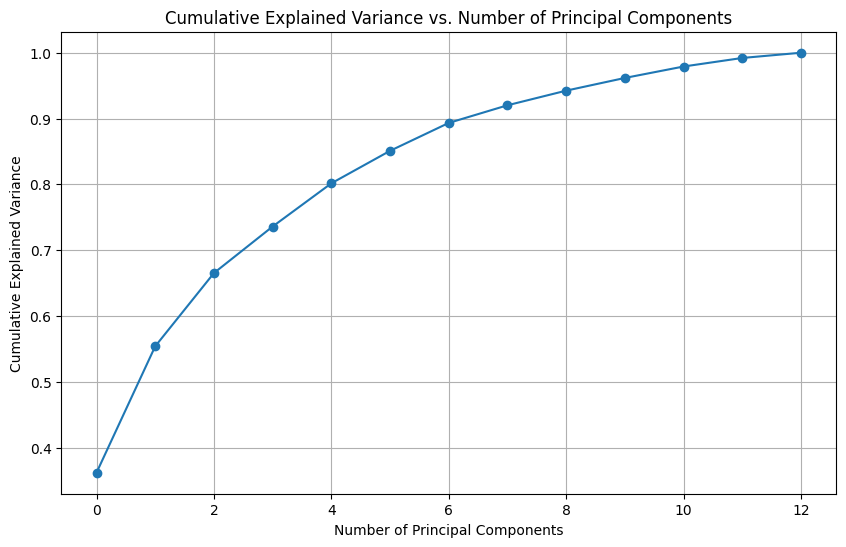

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


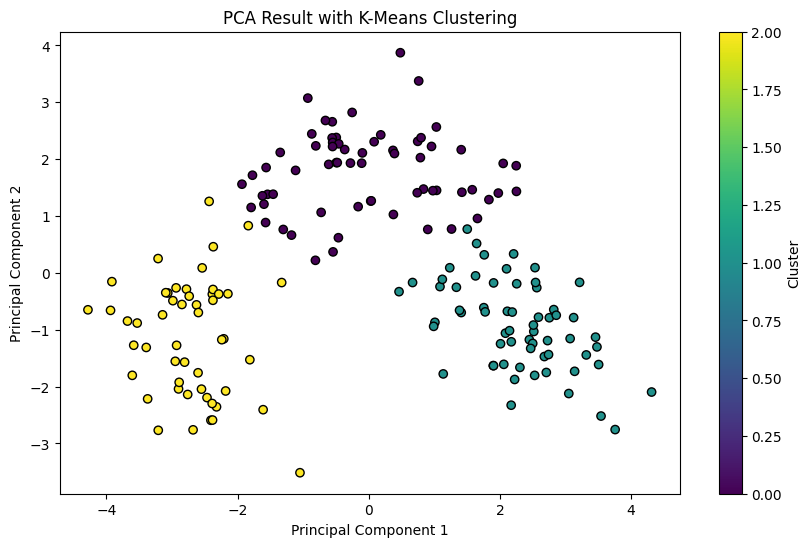

['kmeans_model.pkl']

Number of principal components retained: 10
Silhouette Score: 0.29867482943692897


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
                 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(url, header=None, names=column_names)

# Split dataset into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components to retain (e.g., 95% explained variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Reapply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca_reduced)
clusters = kmeans.labels_

# Calculate clustering performance metrics
silhouette_avg = silhouette_score(X_pca_reduced, clusters)

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title('PCA Result with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Print results
print(f'Number of principal components retained: {num_components}')
print(f'Silhouette Score: {silhouette_avg}')

# Save results
import joblib
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
